# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int32
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))

print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [12]:
from PIL import Image
import numpy as np

# reading an image and convert to array
myimage = np.array(Image.open('img_png/moon.png'))


# write an image (alternative format) from an array
Image.fromarray(myimage).save('image2.png')

Array can be displayed as an image using Matplotlib module. Here a short example:

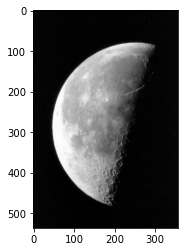

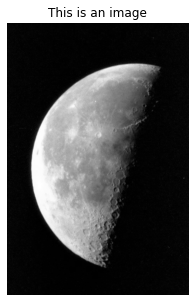

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

myimage=np.array(Image.open('img_png/moon.png'))

# minimal example:

plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes

plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.tif`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [16]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    myImage=np.array(Image.open(fname))
    
    return myImage


I=openImage('img_png/moon.png')
print(I)

[[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]


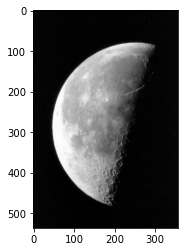

In [17]:
import matplotlib.pyplot as plt
myImage=openImage("img_png/moon.png")
plt.imshow(myImage)
plt.gray()
plt.show()

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [18]:
def countPixels(I,k):
    """ Array*int -> int"""
    
    return np.where(I==k,1,0).sum()


def countPixels2(I,k):
    """ Array*int -> int : Using Loops. """
    n,m=np.shape(I)
    count=0
    for i in np.arange(n):
        for j in np.arange(m):
            if(I[i,j]==k):
                count+=1
    return count

countPixels2(I,3)==countPixels(I,3)


True

3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [19]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    I2=I.copy()
    I2[I2==k1]=k2
    return I2


print(replacePixels(I,3,0))
print("Number of Pixels with the value 3 :",countPixels(replacePixels(I,3,0),3))

[[ 1  0  7 ...  8 16  8]
 [ 0  7  0 ...  4 11 12]
 [ 6  4  6 ...  7  2  0]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  0  0 ...  6  9  9]]
Number of Pixels with the value 3 : 0


4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [21]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    kmin=np.amin(I)
    kmax=np.amax(I)
    
    return (k1+(k2-k1)/(kmax-kmin)*(I-kmin)).astype(int)
    

def normalizeImage2(I,k1,k2):
    """ Array*int*int -> Array """
    kmin=np.amin(I)
    kmax=np.amax(I)
    n,m=np.shape(I)
    
    for i in np.arange(n):
        for j in np.arange(m):
            I[i,j]=int(k1+(k2-k1)/(kmax-kmin)*(I[i,j]-kmin))
    return I
            

a=np.arange(0,30).reshape(3,10)
print("avant la normalisation \n",a)
print("après la normalisation \n",normalizeImage(a,0,15))

avant la normalisation 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
après la normalisation 
 [[ 0  0  1  1  2  2  3  3  4  4]
 [ 5  5  6  6  7  7  8  8  9  9]
 [10 10 11 11 12 12 13 13 14 15]]


5. Write and test a function `inverteImage()` getting an array and returning and arry having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [22]:
def inverteImage(I):
    """ Array -> Array """
    return np.where(I>=0,255-I,I)


a=np.arange(20).reshape(2,10)
print("Avant inversion : \n",a)
print("Après inversion : \n",inverteImage(a))

Avant inversion : 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
Après inversion : 
 [[255 254 253 252 251 250 249 248 247 246]
 [245 244 243 242 241 240 239 238 237 236]]


6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [27]:
def computeHistogram(I):
    """ Array -> list[int] """
    n,m=np.shape(I)
    hist=[]
    for i in np.arange(256):
        hist.append(np.where(I==i,1,0).sum())
    return hist
    
I=openImage('img_png/moon.png')
hist=computeHistogram(I)
print(hist)
# use comments to answer to a verbal question

#Non ce n'est pas possible de faire l'histogramme d'une image sans visiter tous ses pixels

[1459, 20126, 30924, 25408, 17167, 11368, 7369, 4767, 3213, 2178, 1486, 993, 632, 488, 371, 301, 255, 217, 201, 202, 190, 165, 168, 140, 160, 157, 129, 136, 140, 135, 137, 121, 137, 114, 127, 129, 115, 132, 123, 124, 101, 91, 122, 116, 129, 109, 108, 116, 113, 123, 109, 140, 101, 109, 114, 117, 140, 127, 140, 142, 129, 134, 192, 160, 179, 165, 170, 154, 155, 159, 164, 184, 166, 180, 169, 132, 153, 171, 165, 156, 166, 142, 151, 179, 159, 154, 167, 166, 179, 163, 195, 198, 181, 216, 230, 231, 250, 256, 264, 291, 245, 242, 279, 247, 261, 304, 287, 286, 296, 286, 292, 296, 285, 312, 274, 312, 282, 308, 296, 267, 273, 304, 327, 263, 286, 282, 272, 246, 238, 227, 243, 225, 239, 233, 242, 248, 258, 262, 263, 309, 338, 336, 324, 318, 335, 326, 327, 316, 314, 293, 313, 328, 292, 300, 296, 326, 341, 312, 336, 326, 362, 357, 384, 382, 414, 442, 420, 483, 448, 499, 448, 499, 468, 486, 498, 519, 551, 524, 543, 544, 527, 504, 497, 519, 521, 539, 538, 501, 536, 550, 503, 514, 557, 541, 480, 495, 484,

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [29]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    return np.where(I<s,0,255)


I=openImage('img_png/moon.png')
print("Avant le seuillage :\n",I)
print("Après le seuillage :\n",thresholdImage(I,5))


Avant le seuillage :
 [[ 1  3  7 ...  8 16  8]
 [ 3  7  3 ...  4 11 12]
 [ 6  4  6 ...  7  2  3]
 ...
 [ 4  8  8 ...  6  4  8]
 [ 4  8  8 ...  4  6  6]
 [ 2  3  3 ...  6  9  9]]
Après le seuillage :
 [[  0   0 255 ... 255 255 255]
 [  0 255   0 ...   0 255 255]
 [255   0 255 ... 255   0   0]
 ...
 [  0 255 255 ... 255   0 255]
 [  0 255 255 ...   0 255 255]
 [  0   0   0 ... 255 255 255]]


8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

Image avant Inversion :



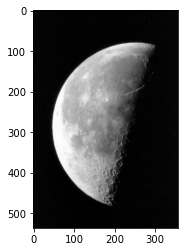

Histogramme de l'image avant Inversion :



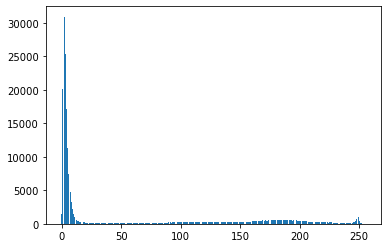

Image après Inversion


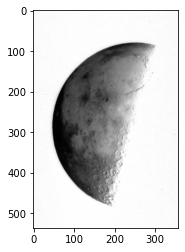

Histogramme de l'image après Inversion :



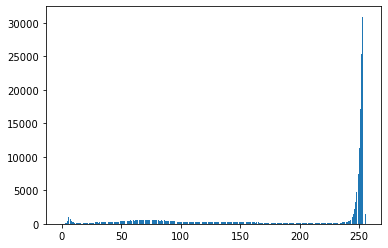

In [30]:
import matplotlib.pyplot as plt

print("Image avant Inversion :\n")
I=openImage("img_png/moon.png")
plt.imshow(I)
plt.show()

val=np.arange(256).tolist()  #l'axe des x de la figure
print("Histogramme de l'image avant Inversion :\n")
plt.bar(val,computeHistogram(I))
plt.show()

inverseI=inverteImage(I) #Inversion

print("Image après Inversion")
plt.imshow(inverseI)
plt.show()

print("Histogramme de l'image après Inversion :\n")
plt.bar(val,computeHistogram(inverseI))
plt.show()


9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

Image avant Normalisation :



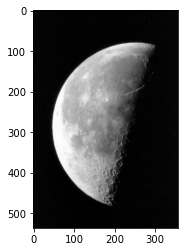

Histogramme de l'image avant Normalisation :



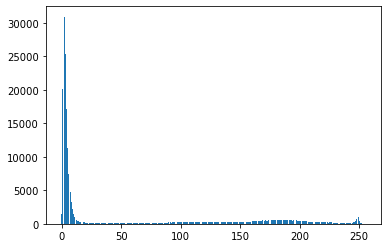

Image après la normalisation :



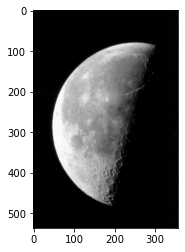

Histogramme de l'image après Normalisation :



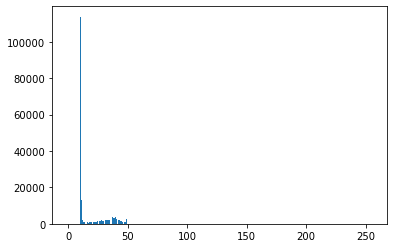

In [31]:
import matplotlib.pyplot as plt

print("Image avant Normalisation :\n")
I=openImage("img_png/moon.png")
plt.imshow(I)
plt.show()

print("Histogramme de l'image avant Normalisation :\n")
val=np.arange(256).tolist()
plt.bar(val,computeHistogram(I))
plt.show()

normalizedI=normalizeImage(I,10,50) #Normalisation de l'image vers l'intervalle [10,50]

print("Image après la normalisation :\n")
plt.imshow(normalizedI)
plt.show()

print("Histogramme de l'image après Normalisation :\n")
plt.bar(val,computeHistogram(normalizedI))
plt.show()

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

Image avant le seuillage :



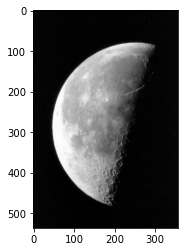

Histogramme de l'image avant le seuillage :



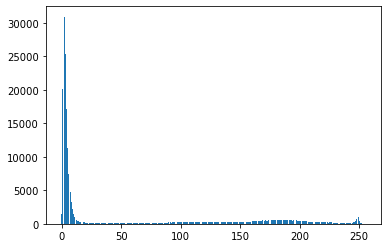

Image après le seuillage :



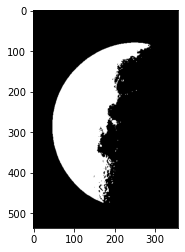

Histogramme après le seuillage :



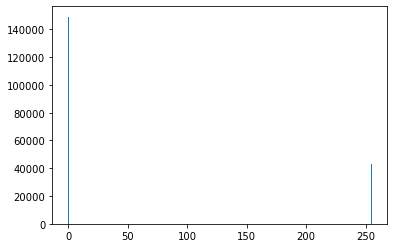

In [32]:
import matplotlib.pyplot as plt

print("Image avant le seuillage :\n")
I=openImage("img_png/moon.png")
plt.imshow(I)
plt.show()

print("Histogramme de l'image avant le seuillage :\n")
val=np.arange(256).tolist()
plt.bar(val,computeHistogram(I))
plt.show()

thresholdI=thresholdImage(I,127) # seuillage

print("Image après le seuillage :\n")
plt.imshow(thresholdI)
plt.show()

print("Histogramme après le seuillage :\n")
plt.bar(val,computeHistogram(thresholdI))
plt.show()

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 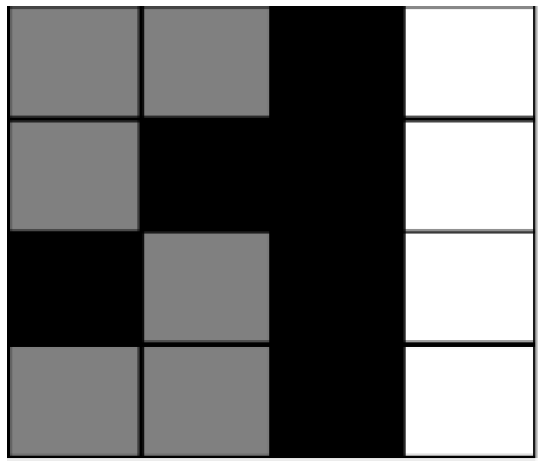 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

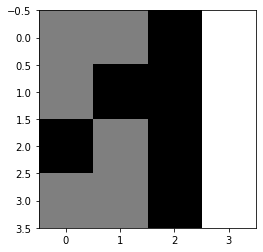

In [33]:
I=np.array([[127,127,0,255],[127,0,0,255],[0,127,0,255],[127,127,0,255]])
plt.imshow(I)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

Image générée par une distribution uniforme et normale :



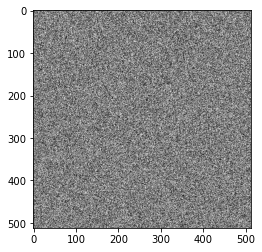

Son Histogramme :



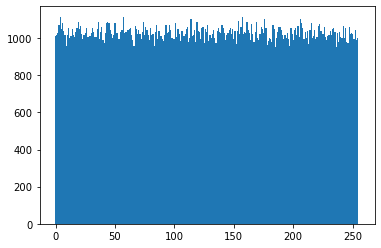

Image générée par une loi normale de moyenne 128 et d'écart type 16 :



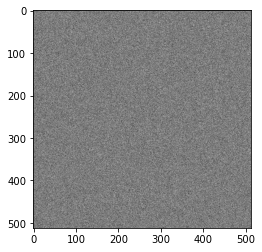

Son Histogramme :



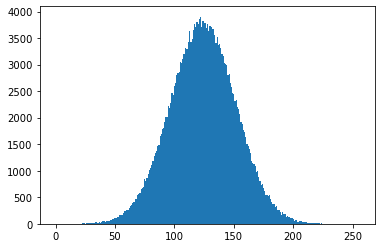

In [34]:
import numpy.matlib as npm

#uniform and normal distribution
I1=(npm.rand(512,512)) # donne des valeurs entre 0 et 1, du coup il faut normaliser vers l'intervalle [0,255]
I1=normalizeImage(I1,0,255)

print("Image générée par une distribution uniforme et normale :\n")
plt.imshow(I1)
plt.show()

print("Son Histogramme :\n")
val=np.arange(256).tolist()
plt.bar(val,computeHistogram(I1),1)
plt.show()


#gaussian distribution
I2=(np.random.normal(128,16,(512,512))) #Loi normale de moyenne 128 et d'écart type 16 qui genere un tableau de taille 512*512
I2=normalizeImage(I2,0,255)             #qui contient des valeurs entre 0 et 1, donc on doit normaliser vers [0,255]

print("Image générée par une loi normale de moyenne 128 et d'écart type 16 :\n")
plt.imshow(I2)
plt.show()

print("Son Histogramme :\n")
val=np.arange(256).tolist()
plt.bar(val,computeHistogram(I2),1)
plt.show()


## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.tif`. 

1. Read and display this image

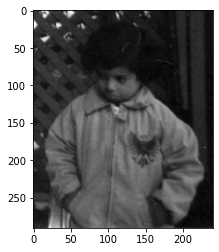

In [35]:
I=openImage("img_png/pout.png")
plt.imshow(I)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

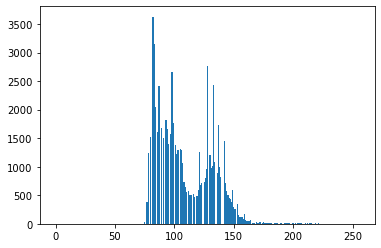

Max pixel value : 224
Min pixel value : 74


In [36]:
plt.bar(val,computeHistogram(I),1)
plt.show()

print("Max pixel value :",np.amax(I))
print("Min pixel value :",np.amin(I))

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.tif` and discuss the result.

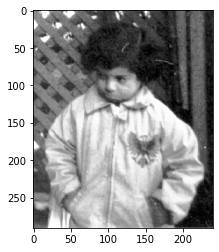

In [29]:
def histogramEqualization(I):
    """ Array * (list[int] -> Array """
    cumul_hist=[] #Histogramme cumulé
    val_hist=computeHistogram(I) # Histogramme de l'image I
    length=len(val_hist)
    x=0
    n,m=np.shape(I)
    J=np.zeros((n,m))
    
    for i in np.arange(length):   #calcul de l'histogramme cumulé
        x+=val_hist[i]
        cumul_hist.append(x)
    cumul_hist=np.array(cumul_hist)
    
    for i in np.arange(n):      #Equalization
        for j in np.arange(m):
            J[i,j]=int(cumul_hist[I[i,j]]*255/(n*m))
    
    return J

J=histogramEqualization(I)
plt.imshow(J)
plt.show()

    

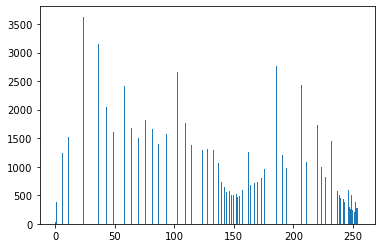

In [30]:
plt.bar(val,computeHistogram(J))
plt.show()